In [1]:
import os
import zipfile36 as zipfile 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image
import tensorflow as tf
tf.__version__

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Dropout

In [20]:
train_data_dir = './data/train'
validation_data_dir = './data/validation'

batch_size = 64
epochs = 10
input_shape = (150, 150, 3)

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

# Création du modèle
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(62, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

validation_loss, validation_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {validation_acc * 100:.2f}%")


Found 2728 images belonging to 62 classes.
Found 682 images belonging to 62 classes.
Epoch 1/10
43/43 [==============================] - 52s 1s/step - loss: 4.0514 - accuracy: 0.0444 - val_loss: 3.6337 - val_accuracy: 0.1364
Epoch 2/10
43/43 [==============================] - 96s 2s/step - loss: 2.8418 - accuracy: 0.2903 - val_loss: 2.4707 - val_accuracy: 0.3592
Epoch 3/10
43/43 [==============================] - 91s 2s/step - loss: 1.5985 - accuracy: 0.5707 - val_loss: 2.0899 - val_accuracy: 0.4839
Epoch 4/10
43/43 [==============================] - 100s 2s/step - loss: 0.9078 - accuracy: 0.7427 - val_loss: 2.1146 - val_accuracy: 0.5440
Epoch 5/10
43/43 [==============================] - 33s 733ms/step - loss: 0.4358 - accuracy: 0.8688 - val_loss: 2.2504 - val_accuracy: 0.5630
Epoch 6/10
43/43 [==============================] - 44s 1s/step - loss: 0.2192 - accuracy: 0.9384 - val_loss: 2.5895 - val_accuracy: 0.5543
Epoch 7/10
43/43 [==============================] - 36s 838ms/step - lo

In [6]:
model.save("./data/save/")

INFO:tensorflow:Assets written to: ./data/save/assets


INFO:tensorflow:Assets written to: ./data/save/assets


11/11 [==============================] - 7s 618ms/step - loss: 3.0794 - accuracy: 0.5543
Validation Accuracy: 55.43%


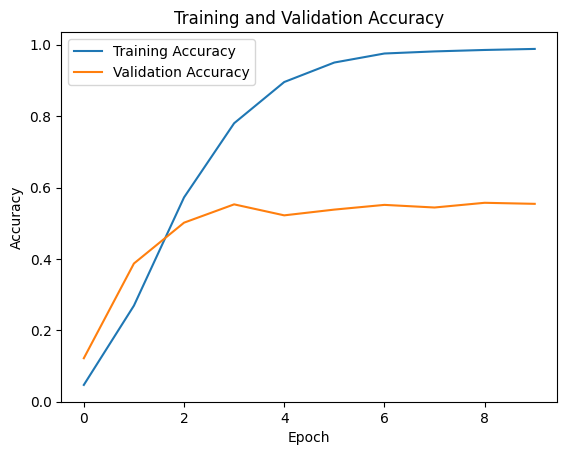

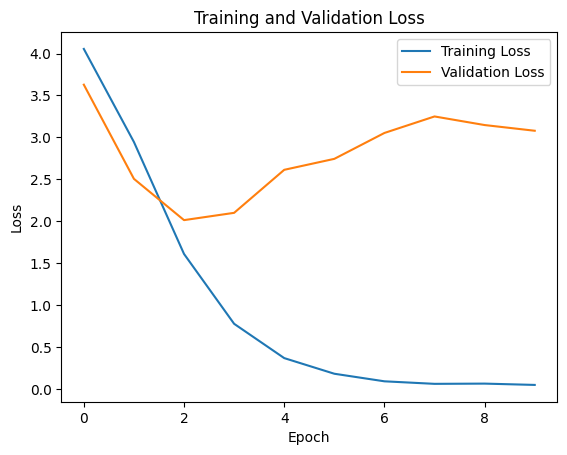

In [3]:
validation_loss, validation_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {validation_acc * 100:.2f}%")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [4]:
train_data_dir = './data/train'
validation_data_dir = './data/validation'

batch_size = 32
epochs = 20 
input_shape = (150, 150, 3)

# Prétraitement des images avec augmentation des données
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(62, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)


Found 2728 images belonging to 62 classes.
Found 682 images belonging to 62 classes.
Epoch 1/20
86/86 [==============================] - 80s 905ms/step - loss: 4.9102 - accuracy: 0.0161 - val_loss: 4.2983 - val_accuracy: 0.0161
Epoch 2/20
86/86 [==============================] - 106s 1s/step - loss: 4.5315 - accuracy: 0.0418 - val_loss: 4.4766 - val_accuracy: 0.0161
Epoch 3/20
86/86 [==============================] - 56s 646ms/step - loss: 4.2840 - accuracy: 0.0480 - val_loss: 4.6040 - val_accuracy: 0.0161
Epoch 4/20
86/86 [==============================] - 62s 724ms/step - loss: 4.0499 - accuracy: 0.0678 - val_loss: 4.2228 - val_accuracy: 0.0249
Epoch 5/20
86/86 [==============================] - 73s 848ms/step - loss: 3.8982 - accuracy: 0.0740 - val_loss: 3.8335 - val_accuracy: 0.0645
Epoch 6/20
86/86 [==============================] - 83s 965ms/step - loss: 3.7208 - accuracy: 0.0850 - val_loss: 5.6865 - val_accuracy: 0.0161
Epoch 7/20
86/86 [==============================] - 78s 908

22/22 [==============================] - 7s 335ms/step - loss: 4.6102 - accuracy: 0.0850
Validation Accuracy: 8.50%


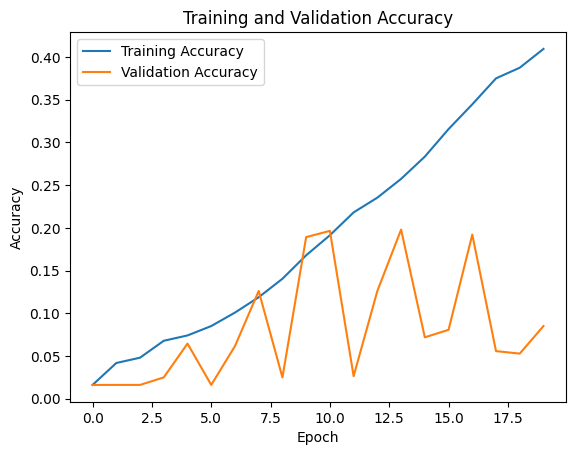

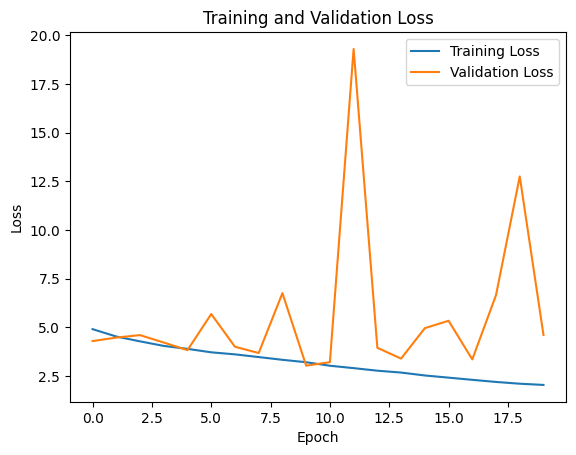

In [5]:
validation_loss, validation_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {validation_acc * 100:.2f}%")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
from tensorflow.keras.optimizers import Adam

batch_size = 64
epochs = 15
input_shape = (150, 150, 3)

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(62, activation='softmax'))

opt = Adam(learning_rate=0.0001)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

validation_loss, validation_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {validation_acc * 100:.2f}%")


Found 2728 images belonging to 62 classes.
Found 682 images belonging to 62 classes.
Epoch 1/15
43/43 [==============================] - 166s 4s/step - loss: 4.3356 - accuracy: 0.0601 - val_loss: 4.2215 - val_accuracy: 0.0161
Epoch 2/15
43/43 [==============================] - 166s 4s/step - loss: 3.1735 - accuracy: 0.2317 - val_loss: 4.4066 - val_accuracy: 0.0161
Epoch 3/15
43/43 [==============================] - 167s 4s/step - loss: 2.6752 - accuracy: 0.3435 - val_loss: 4.4597 - val_accuracy: 0.0161
Epoch 4/15
43/43 [==============================] - 81s 2s/step - loss: 2.2074 - accuracy: 0.4747 - val_loss: 4.4781 - val_accuracy: 0.0161
Epoch 5/15
43/43 [==============================] - 93s 2s/step - loss: 1.8163 - accuracy: 0.5913 - val_loss: 4.6699 - val_accuracy: 0.0147
Epoch 6/15
43/43 [==============================] - 156s 4s/step - loss: 1.4807 - accuracy: 0.6954 - val_loss: 4.4517 - val_accuracy: 0.0191
Epoch 7/15
43/43 [==============================] - 143s 3s/step - loss

11/11 [==============================] - 4s 329ms/step - loss: 2.8212 - accuracy: 0.3182
Validation Accuracy: 31.82%


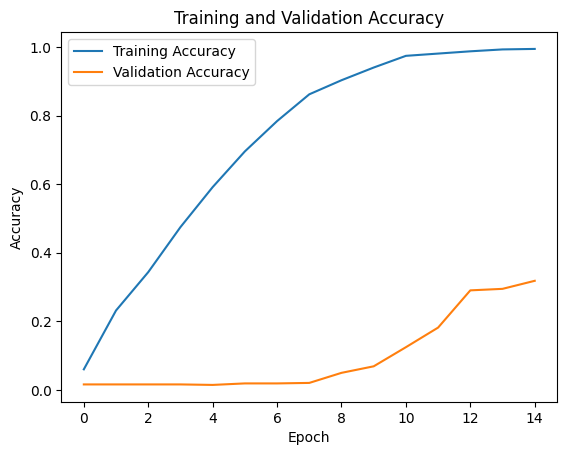

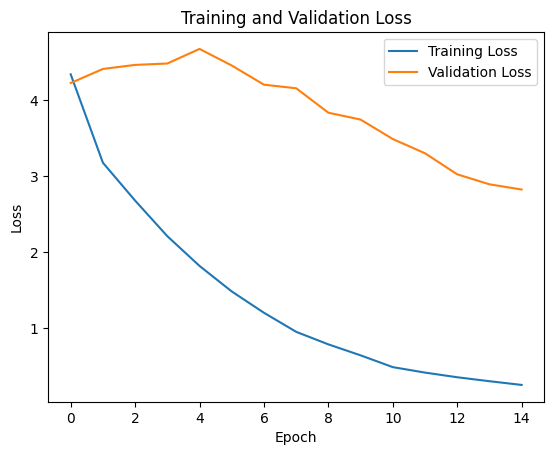

In [11]:
validation_loss, validation_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {validation_acc * 100:.2f}%")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 34ms/step


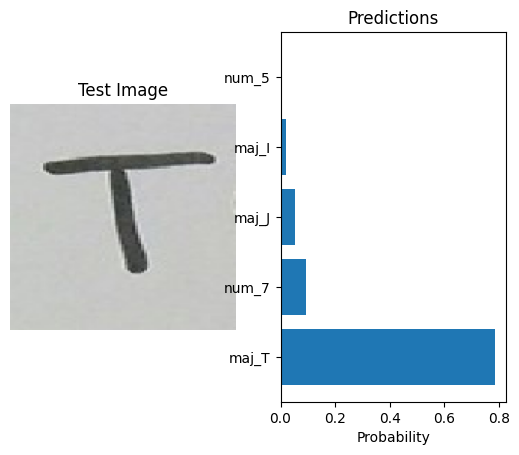

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image de test
test_image_path = 'C:/Users/rapha/Downloads/ocr_maj_T.jpg'
test_img = image.load_img(test_image_path, target_size=(150, 150))

# Convertir l'image en tableau Numpy
test_img_array = image.img_to_array(test_img)
test_img_array = np.expand_dims(test_img_array, axis=0)
test_img_array /= 255.0  # Normaliser l'image

# Utiliser le modèle pour la prédiction
predictions = model.predict(test_img_array)

# Récupérer les noms des classes
class_names = list(train_generator.class_indices.keys())

# Obtenir les indices des 5 meilleures prédictions
top5_indices = np.argsort(predictions.ravel())[-5:][::-1]
top5_classes = [class_names[i] for i in top5_indices]
top5_probs = predictions.ravel()[top5_indices]

# Affichage de l'image
plt.subplot(1, 2, 1)
plt.imshow(test_img)
plt.title('Test Image')
plt.axis('off')

# Affichage des résultats de la prédiction (Top 5)
plt.subplot(1, 2, 2)
plt.barh(top5_classes, top5_probs)
plt.xlabel('Probability')
plt.title('Predictions')
plt.show()
